Week 4: Brandon Mather DSC550-T301

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import make_scorer, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
#1:Load the data as a Pandas data frame and ensure that it imported correctly.
data = pd.read_csv('auto-mpg.csv')

In [4]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
#2: Begin by prepping the data for modeling: Remove the car name column.
data.drop('car name', inplace=True, axis=1)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [4]:
#The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.
data['horsepower'] = data['horsepower'].replace('?', 
    np.mean(pd.to_numeric(data['horsepower'], errors='coerce')))

In [5]:
#Create dummy variables for the origin column
dummies = pd.get_dummies(data['origin'])
data = pd.concat([data, dummies], axis=1)
data.drop('origin', inplace=True, axis=1)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,1,2,3
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,1,0
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [27]:
#3: Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?
matrix = data.corr()
matrix

,mpg,cylinders,displacement,weight,acceleration,model year,1,2,3
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,0.651407,-0.373886,-0.433505
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,-0.139883,-0.024489,0.193101
1,-0.568192,0.604351,0.651407,0.598398,-0.250806,-0.139883,1.000000,-0.597198,-0.643317
2,0.259022,-0.352861,-0.373886,-0.298843,0.204473,-0.024489,-0.597198,1.000000,-0.229895
3,0.442174,-0.396479,-0.433505,-0.440817,0.109144,0.193101,-0.643317,-0.229895,1.000000


Based off these numbers, it looks like Weight, Displacement, and cylinders has a negative correlation with MPG, and acceleration and model year have a slight positive correlation with MPG. The negative correlations are much stronger. Weight has the largest correlation either direction. 

Text(0, 0.5, 'Weight')

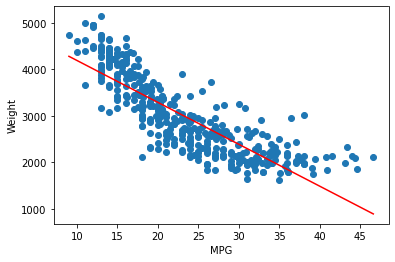

In [30]:
#4: Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.
plt.scatter(data['mpg'], data['weight'])
plt.plot(np.unique(data['mpg']), np.poly1d(np.polyfit(data['mpg'], data['weight'], 1))
         (np.unique(data['mpg'])), color='red')
plt.xlabel('MPG')
plt.ylabel('Weight')

This shows that the correlation that the lower the weight, the higher the MPG, showing a negative correlation. 

In [6]:
#5: Randomly split the data into 80% training data and 20% test data, where your target is mpg.
y = data.mpg

In [7]:
x = data.drop('mpg',axis=1)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
#6: Train an ordinary linear regression on the training data.
reg = LinearRegression().fit(x, y)

C:\Users\brand\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [27]:
reg.coef_

array([-0.42081606,  0.02361652, -0.01335768, -0.00696597,  0.09957094,
        0.78421339, -1.87009498,  0.91246382,  0.95763116])

In [28]:
#7: Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.
reg.score(x, y)

C:\Users\brand\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8244697856581006

In [35]:
pred = reg.predict(x_test)

C:\Users\brand\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [36]:
mean = mean_squared_error(y_test, pred) 

In [38]:
rmse = np.sqrt(mean_squared_error(y_test,pred))

In [39]:
rmse

2.8021694138181528

In [41]:
mae = np.sqrt(mean_absolute_error(y_test,pred))

In [42]:
mae

1.4936686534205834

In [ ]:
#8:Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more
#like a classification model.

In [43]:
#Lasso Regression model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [44]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [45]:
regression = Lasso(alpha=0.5)

In [48]:
model = regression.fit(x, y)

C:\Users\brand\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [49]:
model.coef_

array([-0.00000000e+00,  6.29633864e-04, -3.99125373e-03, -6.64144517e-03,
        0.00000000e+00,  7.11084623e-01, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [50]:
model.score(x, y)

C:\Users\brand\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8075956913714164